In [0]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#unzip data folder
!unzip "/content/gdrive/My Drive/data-1.zip"

Archive:  /content/gdrive/My Drive/data-1.zip
  inflating: data.h5                 


In [0]:
#check if the folder exists
!ls

data.h5  gdrive  sample_data


In [0]:
#import the data into the notebook
import numpy as np
import h5py

def loadData():
  
  with h5py.File('data.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    allTrain = hf.get('trainData')
    allTest = hf.get('testData')
    npTrain = np.array(allTrain)
    npTest = np.array(allTest)
    print('Shape of the array dataset_1: \n', npTrain.shape)
    print('Shape of the array dataset_2: \n', npTest.shape)
  return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

trainX, trainY, testX, testY = loadData()

List of arrays in this file: 
 <KeysViewHDF5 ['testData', 'trainData']>
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [0]:
#change version of tensorflow to 2.x and import packages
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.2.0-rc2


In [0]:
#import other packages
from tensorflow import keras
from tensorflow.keras import layers

#compute the number of classes in the data
no_classes = keras.utils.to_categorical(trainY, num_classes=None, dtype='float32').shape[1]
print(no_classes)



10


In [0]:
# model1 - 1 layer - softmax layer
model1 = tf.keras.models.Sequential()
model1.add(layers.Dense(no_classes, activation=tf.nn.softmax, input_shape= (trainX.shape[1],)))

model1.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history1 = model1.fit(trainX, trainY, epochs=20, batch_size = 256, validation_split = 0.2)

results1 = model1.evaluate(testX, testY)
print (results1)

Epoch 1/20
625/625 [==============================] - 2s 4ms/step - loss: 0.7509 - accuracy: 0.8002 - val_loss: 0.6742 - val_accuracy: 0.8227
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 0.6534 - accuracy: 0.8274 - val_loss: 0.6562 - val_accuracy: 0.8263
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 0.6407 - accuracy: 0.8303 - val_loss: 0.6522 - val_accuracy: 0.8280
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 0.6341 - accuracy: 0.8321 - val_loss: 0.6491 - val_accuracy: 0.8299
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 0.6303 - accuracy: 0.8328 - val_loss: 0.6438 - val_accuracy: 0.8309
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 0.6275 - accuracy: 0.8337 - val_loss: 0.6441 - val_accuracy: 0.8307
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 0.6261 - accuracy: 0.8337 - val_loss: 0.6417 - val_accuracy: 0.8302
Epoch 

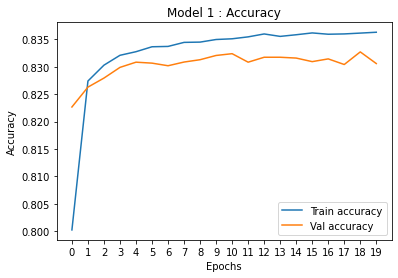

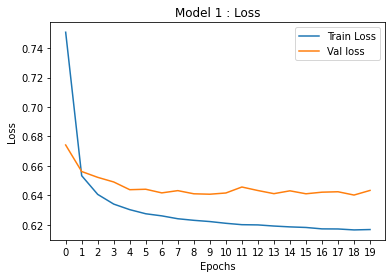

In [0]:
#plot the perfomance of model 1
dictionary1 = history1.history
train_loss = dictionary1['loss']
val_loss = dictionary1['val_loss']
train_accuracy = dictionary1['accuracy']
val_accuracy = dictionary1['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 1 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 1 : Loss')
plt.legend()
plt.show()

In [0]:
# model2 - 2 layers - relu layer, softmax layer
model2 = tf.keras.models.Sequential()
model2.add(layers.Dense(200, activation=tf.nn.relu, input_shape= (trainX.shape[1],)))
model2.add(layers.Dense(no_classes, activation=tf.nn.softmax))

model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history2 = model2.fit(trainX, trainY, epochs=20, batch_size = 256, validation_split = 0.2)

results2 = model2.evaluate(testX, testY)
print (results2)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 0.5398 - accuracy: 0.8441 - val_loss: 0.4674 - val_accuracy: 0.8647
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4169 - accuracy: 0.8791 - val_loss: 0.4180 - val_accuracy: 0.8809
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3737 - accuracy: 0.8907 - val_loss: 0.4024 - val_accuracy: 0.8859
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3449 - accuracy: 0.8989 - val_loss: 0.3916 - val_accuracy: 0.8882
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3234 - accuracy: 0.9052 - val_loss: 0.3974 - val_accuracy: 0.8867
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3061 - accuracy: 0.9106 - val_loss: 0.3809 - val_accuracy: 0.8939
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2908 - accuracy: 0.9141 - val_loss: 0.3865 - val_accuracy: 0.8927
Epoch 

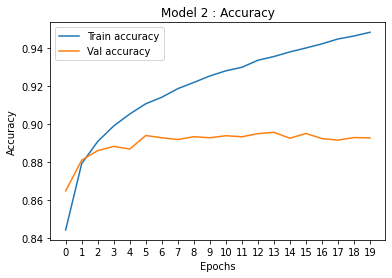

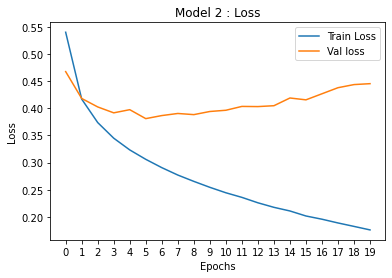

In [0]:
#plot the perfomance of model 2
dictionary2 = history2.history
train_loss_2 = dictionary2['loss']
val_loss_2 = dictionary2['val_loss']
train_accuracy_2 = dictionary2['accuracy']
val_accuracy_2 = dictionary2['val_accuracy']

plt.plot(train_accuracy_2, label='Train accuracy')
plt.plot(val_accuracy_2, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 2 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_2, label='Train Loss')
plt.plot(val_loss_2, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 2 : Loss')
plt.legend()
plt.show()

In [0]:
# model3 - 3 layers - relu layer1, relu layer2, softmax layer
model3 = tf.keras.models.Sequential()
model3.add(layers.Dense(400, activation=tf.nn.relu, input_shape= (trainX.shape[1],)))
model3.add(layers.Dense(200, activation=tf.nn.relu))
model3.add(layers.Dense(no_classes, activation=tf.nn.softmax))

model3.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history3 = model3.fit(trainX, trainY, epochs=20, batch_size = 256, validation_split = 0.2)

results3 = model3.evaluate(testX, testY)
print (results3)

Epoch 1/20
625/625 [==============================] - 3s 5ms/step - loss: 0.4855 - accuracy: 0.8550 - val_loss: 0.4021 - val_accuracy: 0.8795
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 0.3582 - accuracy: 0.8909 - val_loss: 0.3662 - val_accuracy: 0.8906
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.3104 - accuracy: 0.9042 - val_loss: 0.3497 - val_accuracy: 0.8969
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 0.2762 - accuracy: 0.9143 - val_loss: 0.3481 - val_accuracy: 0.8966
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.2494 - accuracy: 0.9216 - val_loss: 0.3470 - val_accuracy: 0.9006
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.2232 - accuracy: 0.9298 - val_loss: 0.3493 - val_accuracy: 0.9006
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.2012 - accuracy: 0.9367 - val_loss: 0.3643 - val_accuracy: 0.9021
Epoch 

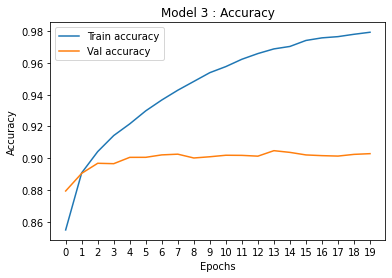

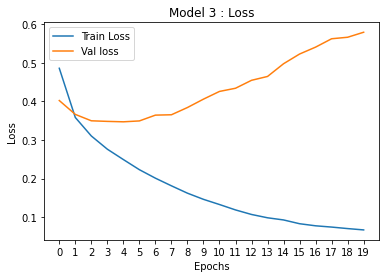

In [0]:
#plot the perfomance of model 3
dictionary3 = history3.history
train_loss_3 = dictionary3['loss']
val_loss_3 = dictionary3['val_loss']
train_accuracy_3 = dictionary3['accuracy']
val_accuracy_3 = dictionary3['val_accuracy']

plt.plot(train_accuracy_3, label='Train accuracy')
plt.plot(val_accuracy_3, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 3 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_3, label='Train Loss')
plt.plot(val_loss_3, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 3 : Loss')
plt.legend()
plt.show()

In [0]:
# model4 - 4 layers - relu layer1, relu layer2, relu layer3, softmax layer
model4 = tf.keras.models.Sequential()
model4.add(layers.Dense(600, activation=tf.nn.relu, input_shape= (trainX.shape[1],)))
model4.add(layers.Dense(400, activation=tf.nn.relu))
model4.add(layers.Dense(200, activation=tf.nn.relu))
model4.add(layers.Dense(no_classes, activation=tf.nn.softmax))

model4.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history4 = model4.fit(trainX, trainY, epochs=20, batch_size = 256, validation_split = 0.2)

results4 = model4.evaluate(testX, testY)
print (results4)

Epoch 1/20
625/625 [==============================] - 4s 6ms/step - loss: 0.4719 - accuracy: 0.8569 - val_loss: 0.3986 - val_accuracy: 0.8784
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3462 - accuracy: 0.8928 - val_loss: 0.3539 - val_accuracy: 0.8920
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2960 - accuracy: 0.9075 - val_loss: 0.3429 - val_accuracy: 0.8962
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2599 - accuracy: 0.9177 - val_loss: 0.3454 - val_accuracy: 0.8987
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2321 - accuracy: 0.9259 - val_loss: 0.3405 - val_accuracy: 0.9018
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2041 - accuracy: 0.9346 - val_loss: 0.3524 - val_accuracy: 0.9015
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.1804 - accuracy: 0.9415 - val_loss: 0.3621 - val_accuracy: 0.9047
Epoch 

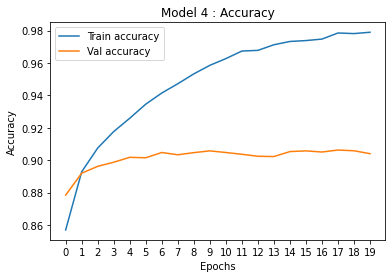

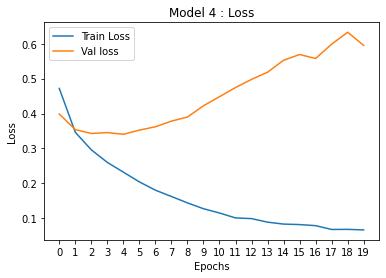

In [0]:
#plot the perfomance of model 4
dictionary4 = history4.history
train_loss_4 = dictionary4['loss']
val_loss_4 = dictionary4['val_loss']
train_accuracy_4 = dictionary4['accuracy']
val_accuracy_4 = dictionary4['val_accuracy']

plt.plot(train_accuracy_4, label='Train accuracy')
plt.plot(val_accuracy_4, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_4, label='Train Loss')
plt.plot(val_loss_4, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4 : Loss')
plt.legend()
plt.show()

In [0]:
# model5 - 5 layers - relu layer1, relu layer2, relu layer3, relu layer4, softmax layer
model5 = tf.keras.models.Sequential()
model5.add(layers.Dense(800, activation=tf.nn.relu, input_shape= (trainX.shape[1],)))
model5.add(layers.Dense(600, activation=tf.nn.relu))
model5.add(layers.Dense(400, activation=tf.nn.relu))
model5.add(layers.Dense(200, activation=tf.nn.relu))
model5.add(layers.Dense(no_classes, activation=tf.nn.softmax))

model5.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history5 = model5.fit(trainX, trainY, epochs=20, batch_size = 256, validation_split = 0.2)

results5 = model5.evaluate(testX, testY)
print (results5)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4686 - accuracy: 0.8559 - val_loss: 0.3935 - val_accuracy: 0.8796
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 0.3445 - accuracy: 0.8927 - val_loss: 0.3593 - val_accuracy: 0.8901
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2968 - accuracy: 0.9064 - val_loss: 0.3332 - val_accuracy: 0.8995
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2632 - accuracy: 0.9162 - val_loss: 0.3313 - val_accuracy: 0.9008
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2347 - accuracy: 0.9251 - val_loss: 0.3301 - val_accuracy: 0.9026
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2103 - accuracy: 0.9317 - val_loss: 0.3408 - val_accuracy: 0.9038
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1896 - accuracy: 0.9382 - val_loss: 0.3465 - val_accuracy: 0.9057
Epoch 

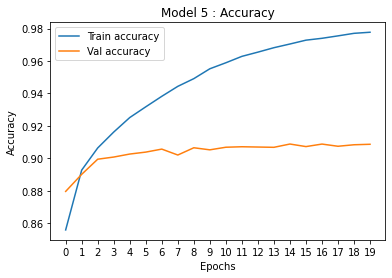

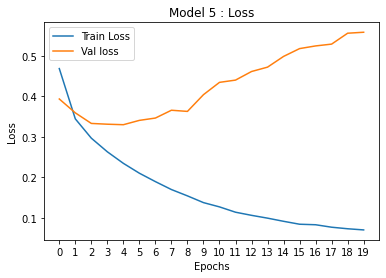

In [0]:
#plot the perfomance of model 5
dictionary5 = history5.history
train_loss_5 = dictionary5['loss']
val_loss_5 = dictionary5['val_loss']
train_accuracy_5 = dictionary5['accuracy']
val_accuracy_5 = dictionary5['val_accuracy']

plt.plot(train_accuracy_5, label='Train accuracy')
plt.plot(val_accuracy_5, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_5, label='Train Loss')
plt.plot(val_loss_5, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5 : Loss')
plt.legend()
plt.show()

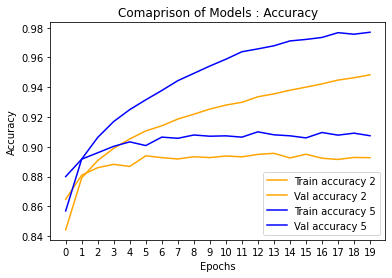

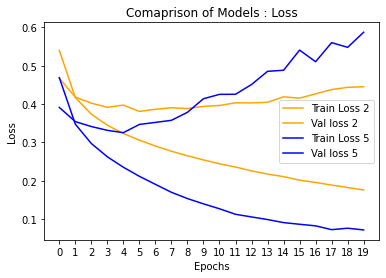

In [0]:
#comparison of accuracies and loss of the 5 models
# plt.plot(train_accuracy, label='Train accuracy 1')
# plt.plot(val_accuracy, label = 'Val accuracy 1')
plt.plot(train_accuracy_2, label='Train accuracy 2',color = 'orange')
plt.plot(val_accuracy_2, label = 'Val accuracy 2',color = 'orange')
# plt.plot(train_accuracy_3, label='Train accuracy 3')
# plt.plot(val_accuracy_3, label = 'Val accuracy 3')
# plt.plot(train_accuracy_4, label='Train accuracy 4')
# plt.plot(val_accuracy_4, label = 'Val accuracy 4')
plt.plot(train_accuracy_5, label='Train accuracy 5', color = 'blue')
plt.plot(val_accuracy_5, label = 'Val accuracy 5', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Accuracy')
plt.legend()
plt.show()


# plt.plot(train_loss, label='Train Loss 1')
# plt.plot(val_loss, label = 'Val loss 1')
plt.plot(train_loss_2, label='Train Loss 2',color = 'orange')
plt.plot(val_loss_2, label = 'Val loss 2', color = 'orange')
# plt.plot(train_loss_3, label='Train Loss 3')
# plt.plot(val_loss_3, label = 'Val loss 3')
# plt.plot(train_loss_4, label='Train Loss 4')
# plt.plot(val_loss_4, label = 'Val loss 4')
plt.plot(train_loss_5, label='Train Loss 5',color = 'blue')
plt.plot(val_loss_5, label = 'Val loss 5',color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Loss')
plt.legend()
plt.show()

In [0]:
#Part2 : Dropout for model4
# model4r - 4 layers - relu layer1, relu layer2, relu layer3, softmax layer
model4r = tf.keras.models.Sequential()
model4r.add(layers.Dense(600, activation=tf.nn.relu, input_shape= (trainX.shape[1],)))
model4r.add(layers.Dropout(0.3))
model4r.add(layers.Dense(400, activation=tf.nn.relu))
model4r.add(layers.Dropout(0.3))
model4r.add(layers.Dense(200, activation=tf.nn.relu))
model4r.add(layers.Dropout(0.3))
model4r.add(layers.Dense(no_classes, activation=tf.nn.softmax))

model4r.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history4r = model4r.fit(trainX, trainY, epochs=20, batch_size = 256, validation_split = 0.2)

results4r = model4r.evaluate(testX, testY)
print (results4r)

Epoch 1/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5601 - accuracy: 0.8308 - val_loss: 0.4263 - val_accuracy: 0.8692
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.4370 - accuracy: 0.8667 - val_loss: 0.3879 - val_accuracy: 0.8816
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3992 - accuracy: 0.8778 - val_loss: 0.3652 - val_accuracy: 0.8884
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3742 - accuracy: 0.8849 - val_loss: 0.3522 - val_accuracy: 0.8923
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3545 - accuracy: 0.8900 - val_loss: 0.3466 - val_accuracy: 0.8935
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3386 - accuracy: 0.8943 - val_loss: 0.3378 - val_accuracy: 0.8971
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3284 - accuracy: 0.8977 - val_loss: 0.3348 - val_accuracy: 0.8988
Epoch 

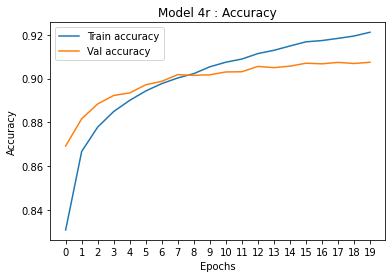

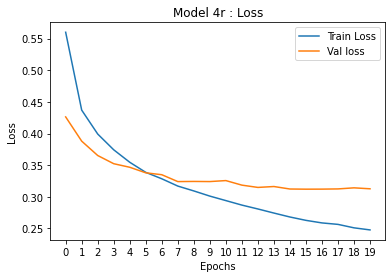

In [0]:
#plot the perfomance of model 4r
dictionary4r = history4r.history
train_loss_4r = dictionary4r['loss']
val_loss_4r = dictionary4r['val_loss']
train_accuracy_4r = dictionary4r['accuracy']
val_accuracy_4r = dictionary4r['val_accuracy']

plt.plot(train_accuracy_4r, label='Train accuracy')
plt.plot(val_accuracy_4r, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4r : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_4r, label='Train Loss')
plt.plot(val_loss_4r, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4r : Loss')
plt.legend()
plt.show()

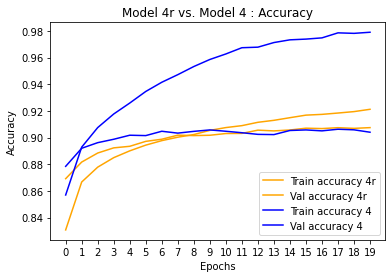

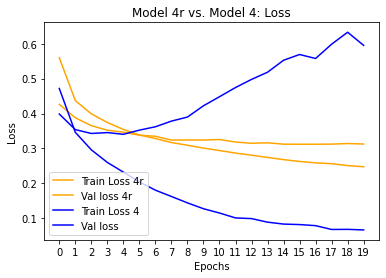

In [0]:
#model4 vs. model4r
plt.plot(train_accuracy_4r, label='Train accuracy 4r', color = 'orange')
plt.plot(val_accuracy_4r, label = 'Val accuracy 4r', color = 'orange')
plt.plot(train_accuracy_4, label='Train accuracy 4',color='blue')
plt.plot(val_accuracy_4, label = 'Val accuracy 4',color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4r vs. Model 4 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_4r, label='Train Loss 4r',color = 'orange')
plt.plot(val_loss_4r, label = 'Val loss 4r',color = 'orange')
plt.plot(train_loss_4, label='Train Loss 4',color = 'blue')
plt.plot(val_loss_4, label = 'Val loss', color ='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4r vs. Model 4: Loss')
plt.legend()
plt.show()

In [0]:
#Part2 : Dropout for model5
# model5r - 5 layers - relu layer1, relu layer2, relu layer3, relu layer4, softmax layer
model5r = tf.keras.models.Sequential()
model5r.add(layers.Dense(800, activation=tf.nn.relu, input_shape= (trainX.shape[1],)))
model5r.add(layers.Dropout(0.3))
model5r.add(layers.Dense(600, activation=tf.nn.relu))
model5r.add(layers.Dropout(0.3))
model5r.add(layers.Dense(400, activation=tf.nn.relu))
model5r.add(layers.Dropout(0.3))
model5r.add(layers.Dense(200, activation=tf.nn.relu))
model5r.add(layers.Dropout(0.3))
model5r.add(layers.Dense(no_classes, activation=tf.nn.softmax))

model5r.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history5r = model5r.fit(trainX, trainY, epochs=20, batch_size = 256, validation_split = 0.2)

results5r = model5r.evaluate(testX, testY)
print (results5r)

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 0.5659 - accuracy: 0.8293 - val_loss: 0.4319 - val_accuracy: 0.8669
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 0.4420 - accuracy: 0.8654 - val_loss: 0.3883 - val_accuracy: 0.8825
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 0.4036 - accuracy: 0.8773 - val_loss: 0.3782 - val_accuracy: 0.8835
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.3750 - accuracy: 0.8852 - val_loss: 0.3508 - val_accuracy: 0.8929
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.3583 - accuracy: 0.8901 - val_loss: 0.3450 - val_accuracy: 0.8942
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.3417 - accuracy: 0.8942 - val_loss: 0.3372 - val_accuracy: 0.8964
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.3304 - accuracy: 0.8978 - val_loss: 0.3354 - val_accuracy: 0.8971
Epoch 

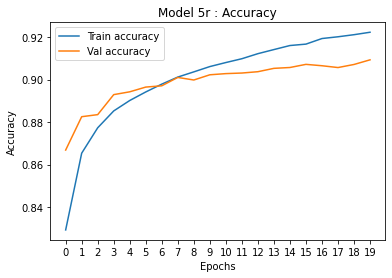

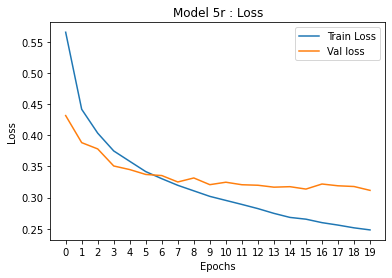

In [0]:
#plot the perfomance of model 5r
dictionary5r = history5r.history
train_loss_5r = dictionary5r['loss']
val_loss_5r = dictionary5r['val_loss']
train_accuracy_5r = dictionary5r['accuracy']
val_accuracy_5r = dictionary5r['val_accuracy']

plt.plot(train_accuracy_5r, label='Train accuracy')
plt.plot(val_accuracy_5r, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5r : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_5r, label='Train Loss')
plt.plot(val_loss_5r, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5r : Loss')
plt.legend()
plt.show()

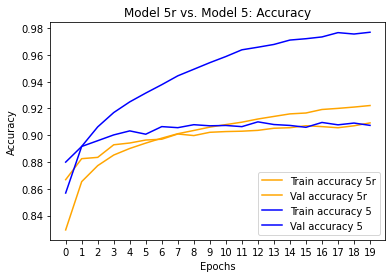

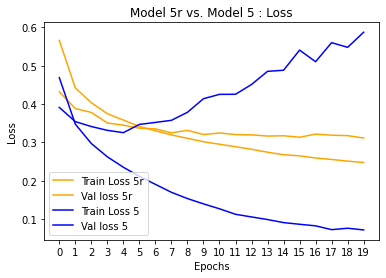

In [0]:
#model4 vs. model4r
plt.plot(train_accuracy_5r, label='Train accuracy 5r', color = 'orange')
plt.plot(val_accuracy_5r, label = 'Val accuracy 5r', color = 'orange')
plt.plot(train_accuracy_5, label='Train accuracy 5', color = 'blue')
plt.plot(val_accuracy_5, label = 'Val accuracy 5', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5r vs. Model 5: Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_5r, label='Train Loss 5r', color = 'orange')
plt.plot(val_loss_5r, label = 'Val loss 5r', color = 'orange')
plt.plot(train_loss_5, label='Train Loss 5', color = 'blue')
plt.plot(val_loss_5, label = 'Val loss 5', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5r vs. Model 5 : Loss')
plt.legend()
plt.show()

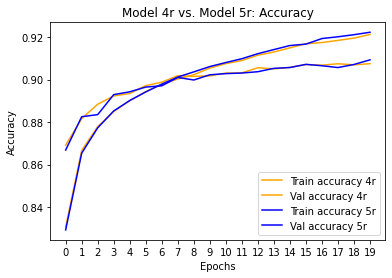

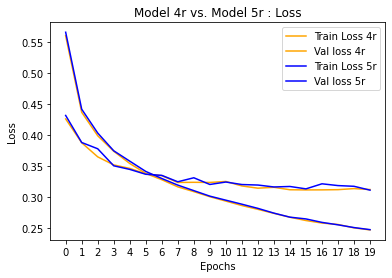

In [0]:
#model4r vs model5r
#no significant obervations, therefore not included in report.
plt.plot(train_accuracy_4r, label='Train accuracy 4r', color = 'orange')
plt.plot(val_accuracy_4r, label = 'Val accuracy 4r', color = 'orange')
plt.plot(train_accuracy_5r, label='Train accuracy 5r', color = 'blue')
plt.plot(val_accuracy_5r, label = 'Val accuracy 5r', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4r vs. Model 5r: Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss_4r, label='Train Loss 4r', color = 'orange')
plt.plot(val_loss_4r, label = 'Val loss 4r', color = 'orange')
plt.plot(train_loss_5r, label='Train Loss 5r', color = 'blue')
plt.plot(val_loss_5r, label = 'Val loss 5r', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4r vs. Model 5r : Loss')
plt.legend()
plt.show()